In [1]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

import rental_utils; reload(rental_utils)

%matplotlib inline
sns.set(style="whitegrid")

In [2]:
data, independent, test = rental_utils.load_data()
[X_train, X_val, y_train, y_val] = data

Loading raw data
Adding features
Adding regions
Adding variables
Dummyfying
Splitting data


In [3]:
model = RandomForestClassifier(bootstrap=True, min_samples_leaf=2, n_estimators=51, 
                                   min_samples_split=9, criterion='entropy', max_features=0.33,
                                   max_depth=87)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=87, max_features=0.33, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=9, min_weight_fraction_leaf=0.0,
            n_estimators=51, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [4]:
preds_train, probs_train = rental_utils.predict(model, X_train)
preds_val, probs_val = rental_utils.predict(model, X_val)

ct = pd.crosstab(preds_val, y_val.values, margins=False)
print(ct)

print('')
ct_perc = ct.apply(lambda x: x/sum(x), axis=1)
print(ct_perc)

print('')
accuracy_val = float(np.sum(preds_val==y_val))/len(preds_val)
print('Validation Accuracy: ' + str(round(100*accuracy_val, 1)))
print('Log loss:            ' + str(round(log_loss(y_val, probs_val), 3)))

print('')
high_accuracy = ct_perc.iloc[0,0]
print('High Accuracy: ' + str(round(100*high_accuracy, 1)))
med_accuracy = ct_perc.iloc[2,2]
print('Medium Accuracy: ' + str(round(100*med_accuracy, 1)))
low_accuracy = ct_perc.iloc[1,1]
print('Low Accuracy: ' + str(round(100*low_accuracy, 1)))

col_0   high    low  medium
row_0                      
high     337     60     193
low      392  10510    2179
medium   521    822    1273

col_0       high       low    medium
row_0                               
high    0.571186  0.101695  0.327119
low     0.029967  0.803455  0.166577
medium  0.199159  0.314220  0.486621

Validation Accuracy: 74.4
Log loss:            0.589

High Accuracy: 57.1
Medium Accuracy: 48.7
Low Accuracy: 80.3


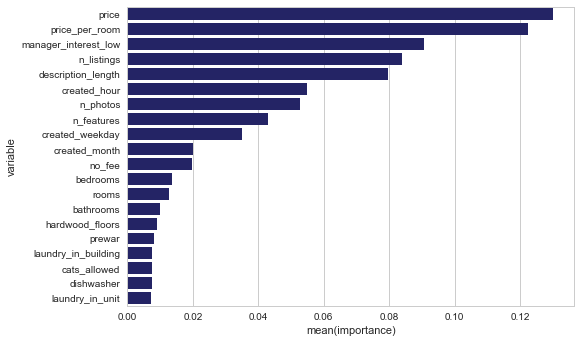

In [5]:
importance = pd.DataFrame({'variable':independent, 'importance':model.feature_importances_})
importance.sort_values(by='importance', ascending=False, inplace=True)
top_importance = importance.head(20)

sns.barplot(y='variable', x='importance', color="midnightblue", data=top_importance)

In [9]:
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])

model.fit(X, y)
pickle.dump(model, open("Models/manual_rf.pkl", "wb"))
rental_utils.prepare_submission(model, test, independent)